In [ ]:
#importing all the neccesary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv('health_insurance.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB
None


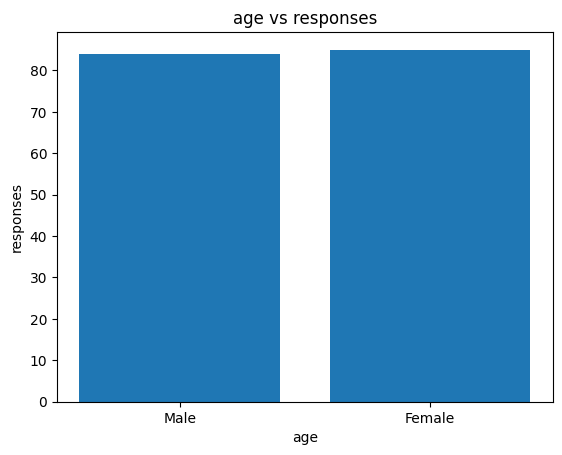

In [ ]:
#visualising dataset usig matplotlib
import matplotlib.pyplot as plt
x = data['Gender']
y = data['Age']
plt.bar(x,y)
plt.title('gender vs age')
plt.xlabel('gender')
plt.ylabel('age')
plt.show()

In [ ]:
# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
print(X)

          id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0          1    Male   44                1         28.0                   0   
1          2    Male   76                1          3.0                   0   
2          3    Male   47                1         28.0                   0   
3          4    Male   21                1         11.0                   1   
4          5  Female   29                1         41.0                   1   
...      ...     ...  ...              ...          ...                 ...   
56837  56838    Male   42                1          5.0                   0   
56838  56839    Male   30                1         41.0                   1   
56839  56840  Female   49                1         28.0                   1   
56840  56841  Female   23                1         35.0                   1   
56841  56842    Male   21                1         15.0                   1   

      Vehicle_Age Vehicle_Damage  Annual_Premium  P

In [ ]:
print(y)

0        1
1        0
2        1
3        0
4        0
        ..
56837    0
56838    0
56839    0
56840    0
56841    0
Name: Response, Length: 56842, dtype: int64


In [ ]:
categorical_data = ['Gender', 'Vehicle_Damage']
numerical_data = ['id','Age','Driving_License', 'Region_Code', 'Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']
target_data = ['Responses']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Label encode the 'Vehicle_Age' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['Vehicle_Age'] = label_encoder.fit_transform(X_train['Vehicle_Age'])
X_test['Vehicle_Age'] = label_encoder.transform(X_test['Vehicle_Age'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('tnf1', StandardScaler(), numerical_data),
        ('tnf2', OneHotEncoder(), categorical_data)
    ],
    remainder='passthrough'  # Pass through any remaining columns
)

In [ ]:
# Transform and fit the preprocessor on the training data
X_train_transformed = preprocessor.fit_transform(X_train)

In [ ]:
print(X_train_transformed)

[[-0.28397079 -0.89011309  0.04575506 ...  1.          0.
   1.        ]
 [ 1.22192787  0.91932862  0.04575506 ...  0.          1.
   0.        ]
 [ 1.17848908  1.63018072  0.04575506 ...  1.          0.
   0.        ]
 ...
 [-1.67913712  0.20847652  0.04575506 ...  0.          1.
   0.        ]
 [-0.76795953 -0.954736    0.04575506 ...  1.          0.
   1.        ]
 [ 1.71067536 -1.01935892  0.04575506 ...  1.          0.
   1.        ]]


In [ ]:
# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
print(X_test_transformed)

[[-1.31143258 -0.954736    0.04575506 ...  1.          0.
   1.        ]
 [-0.46065444 -0.89011309  0.04575506 ...  1.          0.
   1.        ]
 [-1.12840394 -0.954736    0.04575506 ...  1.          0.
   1.        ]
 ...
 [ 0.3690144  -1.01935892  0.04575506 ...  1.          0.
   1.        ]
 [-1.59537101 -0.82549017  0.04575506 ...  1.          0.
   1.        ]
 [ 0.85702977  0.27309944  0.04575506 ...  0.          1.
   0.        ]]


In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

In [ ]:
# Train the model on the transformed training data
model.fit(X_train_transformed, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the transformed test data
y_pred = model.predict(X_test_transformed)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8776497493183217
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      9978
           1       0.00      0.00      0.00      1391

    accuracy                           0.88     11369
   macro avg       0.44      0.50      0.47     11369
weighted avg       0.77      0.88      0.82     11369

